In [2]:
import numpy as np
from matplotlib import pyplot as plt
import copy as copy
from IPython.display import clear_output

In [19]:
#1.a)

# False diffusion is diffusion between two areas with different values, often smeared out as a a more even transition
# than a sudden discontinuity, when applying advection. It is seen in the upwwind scheme below.

Text(0.5, 1.0, 'Central difference method')

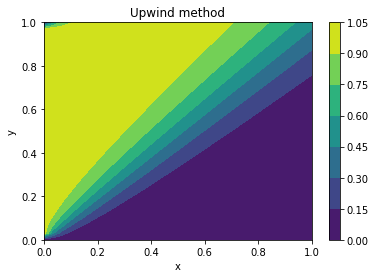

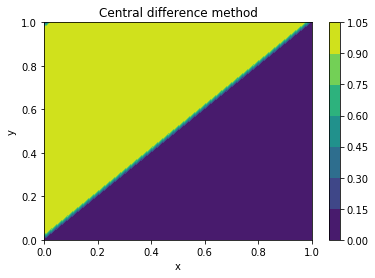

In [3]:
#1.b)

jmax = 33        
h = 1/(jmax - 1)

F =np.zeros([jmax, jmax])

F[0][1:jmax-1] = 1
F2= copy.copy(F)

for i in range(1, jmax):
    for j in range(1, jmax):
        F[i][j]=(F[i-1][j]+F[i][j-1])/2




x = np.linspace(0,1,jmax)
y = np.linspace(0,1,jmax)


plt.figure(1)
plt.contourf(x, y, F.T) #',v)
#axis square
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('Upwind method')

for j in range(1, jmax-1):
    for i in range(1, jmax-1):
        F2[i][j+1] = -1*F2[i+1][j] + F2[i-1][j] + F2[i][j-1]

plt.figure(2)
plt.contourf(x,y,F2.T) #,v)
#axis square
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('Central difference method')

In [22]:
#1.c)
# Due to the false diffusion in the upwind scheme it was easy to differ the two schemes.

In [ ]:
#2.a)
# Periodic boundary conditions are appropriate due to the periodicity of the wave signals.
#2.b)
# A function of t could also be used, p(0, t) = sin(4*pi)*u(t-a)*u(b-t), where u is heaviside.
#2.c)
#The upwind scheme would handle the boundary conditions nice because nu(j) is just calculated from the neighbour
# on its left, not on its right. Due to diffusion however the scheme would probably vanish the signal over time.

14


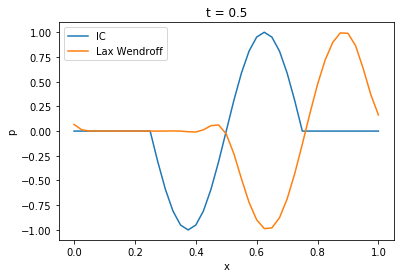

In [4]:
#2.e)
jmax = 41
dx = 1/jmax
c = 0.5
C = 0.75
dt = C*dx/c
tEnd = 0.5
N = int(np.ceil(tEnd/dt))
print(N)

x = np.linspace(0, 1, jmax)
IC = np.sin(4*np.pi*x)*np.heaviside(x-0.25, 1)*np.heaviside(0.75-x, 1)
plt.plot(x, IC, label = "IC")

u = copy.copy(IC)
for n in range(N):
    nu = (1-C**2)*u
    nu[0] = u[-1]
    nu[1:] += u[:jmax-1]*C/2*(C+1)
    nu[:jmax-1] += u[1:]*C/2*(C-1)
    u = nu
    plt.xlabel("x")
    plt.ylabel("p")
    plt.title(f"t = {tEnd}")
plt.plot(x, u, label = "Lax Wendroff")
plt.legend()
    


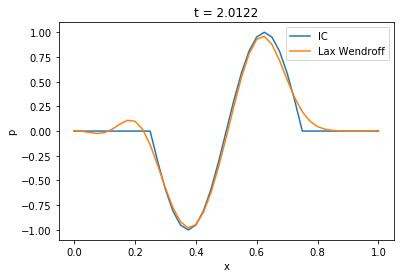

In [8]:
#2.f)
jmax = 41
dx = 1/jmax
c = 0.5
C = 0.75
dt = C*dx/c
tEnd = 2
N = int(np.ceil(tEnd/dt))
print(N)

x = np.linspace(0, 1, jmax)
IC = np.sin(4*np.pi*x)*np.heaviside(x-0.25, 1)*np.heaviside(0.75-x, 1)

u = copy.copy(IC)
for n in range(N):
    nu = (1-C**2)*u
    nu[1:] += u[:jmax-1]*C/2*(C+1)
    nu[:jmax-1] += u[1:]*C/2*(C-1)
    nu[-1] += u[0]*C/2*(C-1)
    nu[0] = u[jmax-1]
    
    u = nu
    plt.plot(x, IC, label = "IC")
    plt.plot(x, u, label = "Lax Wendroff")
    plt.xlabel("x")
    plt.ylabel("p")
    plt.title(f"t = {np.round((n+1)*dt, 4)}")
    plt.legend()
    plt.show()
    clear_output(wait=True)


In [80]:
#There is clearly some diffusion here, but that is expected when using finite differences
#for the second order time derivative.

Norm2 = np.sqrt(dx*np.sum((u-IC)**2))
print(Norm2)

0.11906119646669246


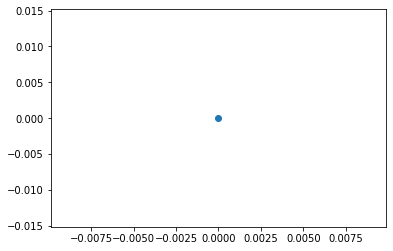

In [79]:
plt.scatter(0,0)